In [213]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [214]:
iran_price = pd.read_csv('dataset/FAO_STAT_iran_producer_prices.csv')
iran_exchange = pd.read_csv('dataset/FAO_STAT_iran_Exchange.csv')

In [215]:
iran_price = iran_price.drop(['Domain Code' , 'Domain' , 'Area Code' , 'Area' , 'Element Code' , 'Item Code' , 'Year Code','Flag' , 'Flag Description'] , axis = 1)

In [216]:
home_basket = ['Wheat', "Meat live weight, cattle", "Meat live weight, sheep", "Milk, whole fresh cow", "Potatoes", "Tomatoes", "Onions, dry",
"Honey, natural", "Tea", "Watermelons", "Sunflower seed", "Soybeans", "Apples", "Rice, paddy", "Eggplants (aubergines)", "Garlic", 
"Fruit, citrus nes", "Fruit, fresh nes", "Vegetables, leguminous nes", "Beans, dry", "Dates", "Lentils", "Oranges", "Tobacco, unmanufactured" , 'Lemons and limes']

In [217]:
for row, col in iran_price.iterrows():
    if col['Item'] not in home_basket:
        iran_price.drop(row, axis= 0, inplace= True)
iran_price.reset_index(inplace=True)

In [218]:
del iran_price['index']

In [219]:
iran_exchange = iran_exchange.drop(['Domain Code' , 'Domain' , 'Area Code' , 'Area' , 'ISO Currency Code' ,'Currency' ,'Item' , 'Item Code' , 'Year Code'
           ,'Note',  'Unit'  , 'Flag' , 'Flag Description'] , axis = 1)

In [220]:
iran_exchange['Value'] = iran_exchange['Value'].astype('int64')
new_exchange = {'Year': [2019,2020] , 'Value': [140000 , 180000] }
new_exchange = pd.DataFrame(new_exchange)
iran_exchange = iran_exchange.append(new_exchange)
iran_exchange.reset_index(inplace=True)
del iran_exchange['index']

In [221]:
iran_price = iran_price.merge(iran_exchange, left_on= "Year", right_on="Year", how= "left", suffixes=(" in Dollars", " Dollar per Rials"))

In [222]:
iran_price['Value in Rials'] = iran_price["Value in Dollars"] * iran_price["Value Dollar per Rials"]

In [223]:
del iran_price['Value Dollar per Rials']

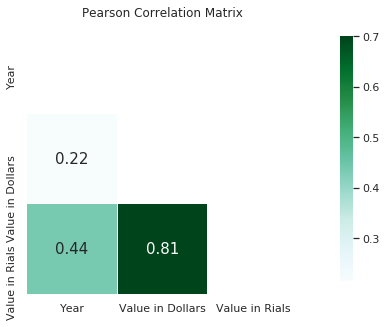

In [224]:
f, ax = plt.subplots(figsize=(15, 5))
mask = np.zeros_like(iran_price.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

plt.title('Pearson Correlation Matrix',fontsize=12)

sns.heatmap(iran_price.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", 
            linecolor='w',annot=True,annot_kws={"size":15},mask=mask,cbar_kws={"shrink": .9});

In [225]:
iran_price['Price per Kg in Rial'] = iran_price['Value in Rials'] / 1000

In [226]:
del iran_price['Value in Dollars']
del iran_price['Value in Rials']
del iran_price['Element']

In [227]:
iran_price['President'] = 0

In [228]:
for i in range(len(iran_price)):
    if iran_price['Year'].iloc[i] >= 1991 and iran_price['Year'].iloc[i] < 1997:
        iran_price['President'].iloc[i] = 'Akbar Hashemi Rafsanjani'
    elif iran_price['Year'].iloc[i] >= 1997 and iran_price['Year'].iloc[i] < 2005:
        iran_price['President'].iloc[i] = 'Mohammad Khatami'
    elif iran_price['Year'].iloc[i] >= 2005 and iran_price['Year'].iloc[i] < 2013:
        iran_price['President'].iloc[i] = 'Mahmoud Ahmadinejad'
    elif iran_price['Year'].iloc[i] >= 2013 and iran_price['Year'].iloc[i] <= 2018:
        iran_price['President'].iloc[i] = 'Hassan Rouhani'

In [229]:
iran_population  = pd.read_csv('dataset/FAO_STAT_iran_population.csv')

In [230]:
iran_population = iran_population[iran_population['Element'] == 'Total Population - Both sexes']

In [231]:
iran_population = iran_population.drop(['Domain Code' , 'Domain' , 'Area Code' , 'Area' , 'Element Code' ,'Element' ,'Item' , 'Item Code' , 'Year Code'
           ,'Note',  'Unit'  , 'Flag' , 'Flag Description'] , axis = 1)

In [232]:
iran_population = iran_population[iran_population['Year'] >= 1991]

In [233]:
iran_population.reset_index(inplace=True)
del iran_population['index']

In [234]:
iran_price = iran_price.merge(iran_population, left_on= "Year", right_on="Year", how= "left", suffixes=(" in Dollars", " Dollar per Rials"))

In [235]:
iran_price.rename(columns={'Value': 'Population'}, inplace=True)

In [236]:
iran_price['Population'] = iran_price['Population'] * 1000

In [237]:
del iran_price['Unit']

In [238]:
list_of_items = list(iran_price['Item'].unique())

In [239]:
color_dict = {'Akbar Hashemi Rafsanjani': "#FF0000", 
              'Mohammad Khatami': "#008000", 
              'Mahmoud Ahmadinejad': "#FF8C00", 
              'Hassan Rouhani': "#9400D3"}

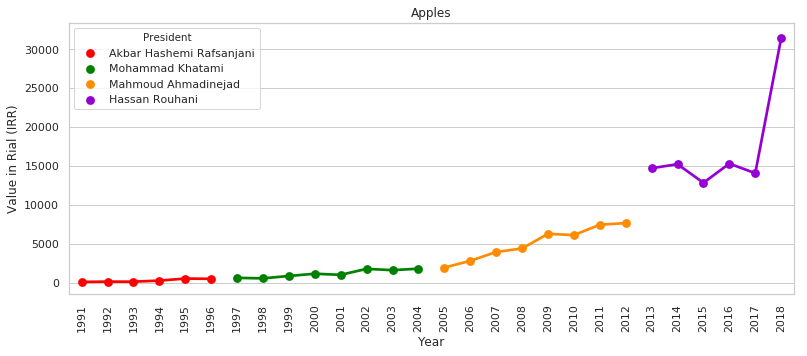

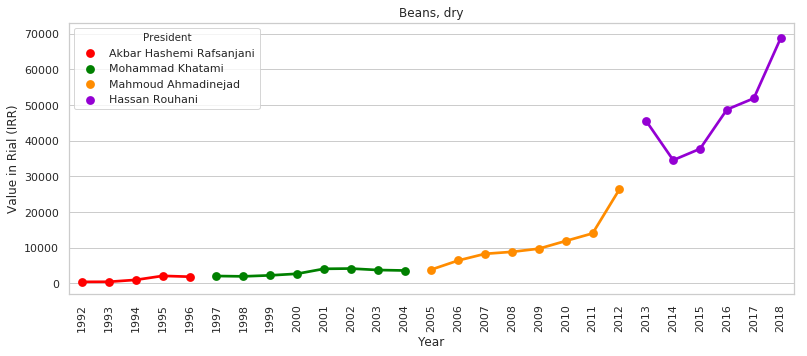

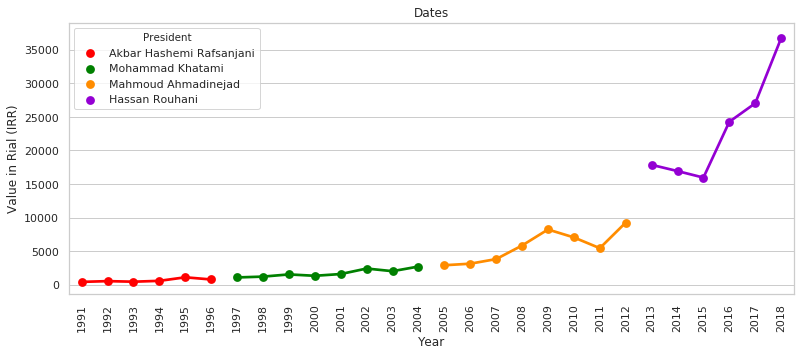

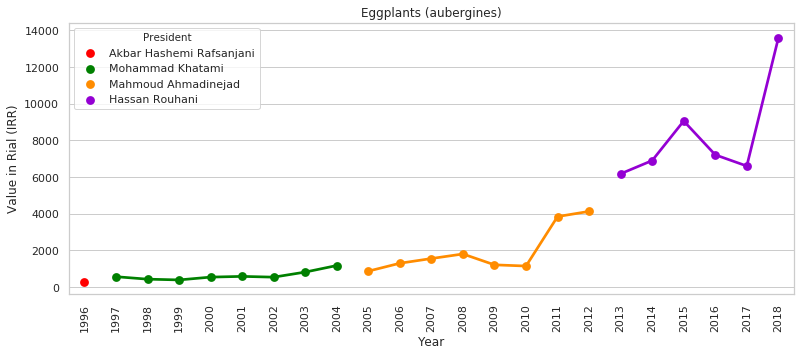

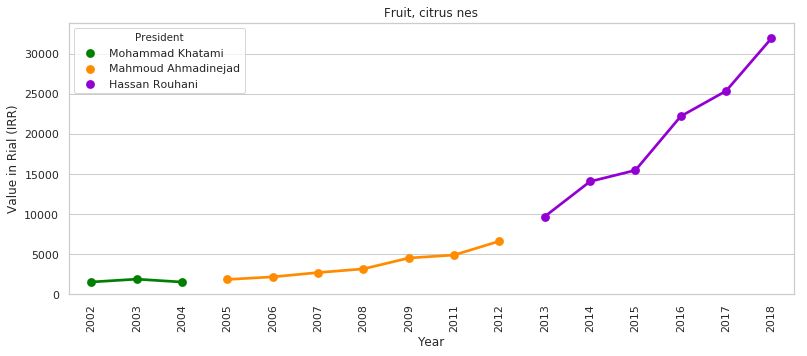

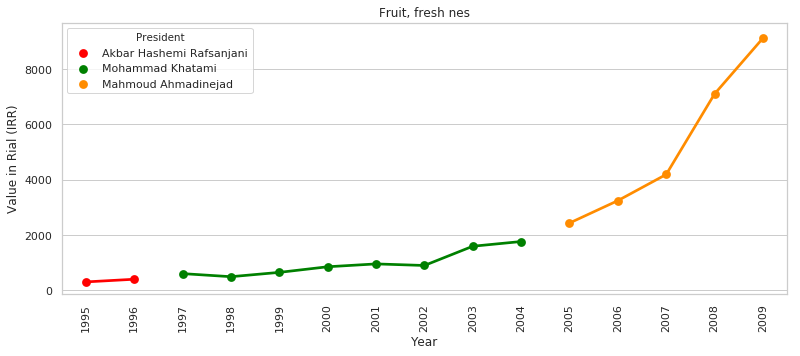

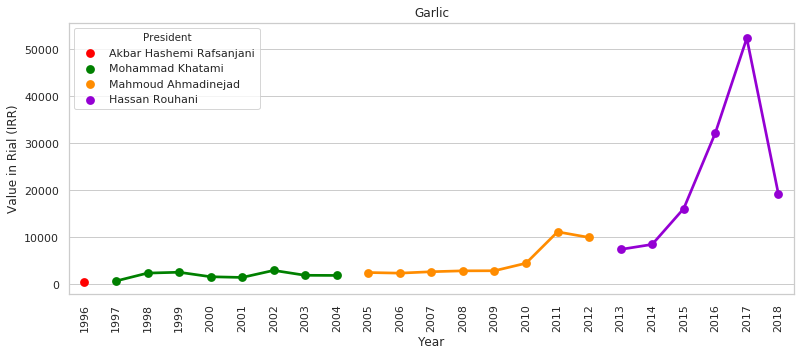

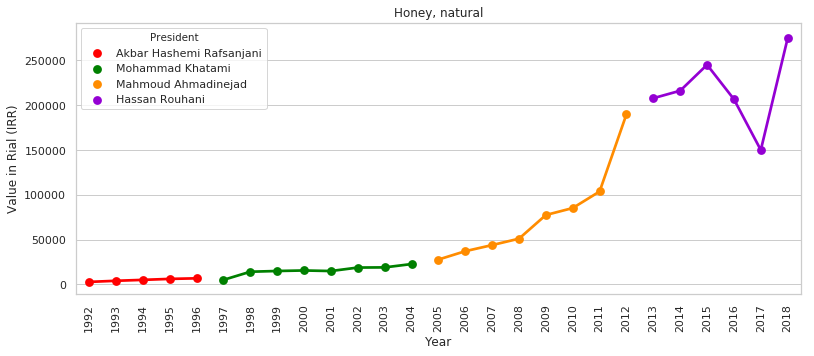

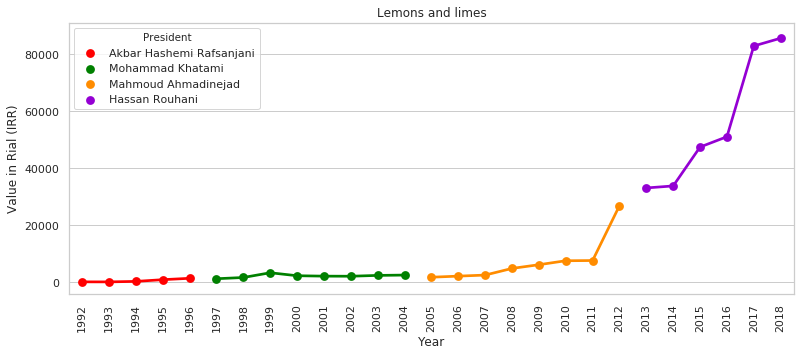

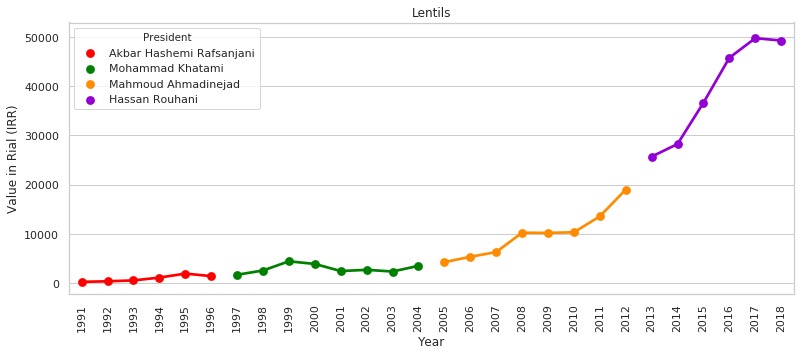

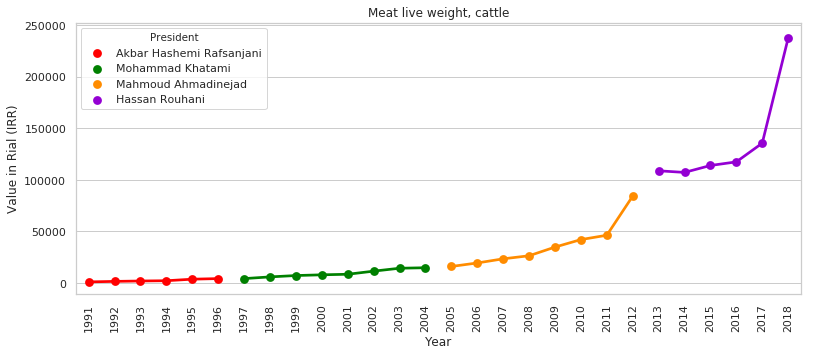

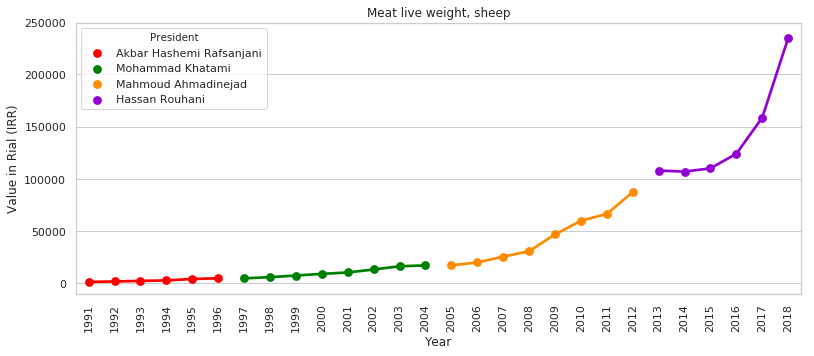

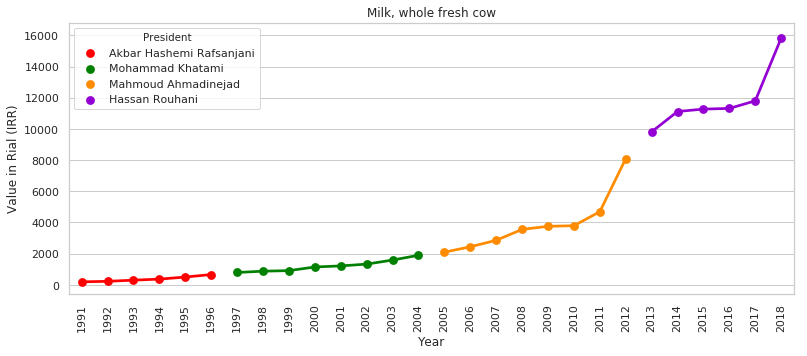

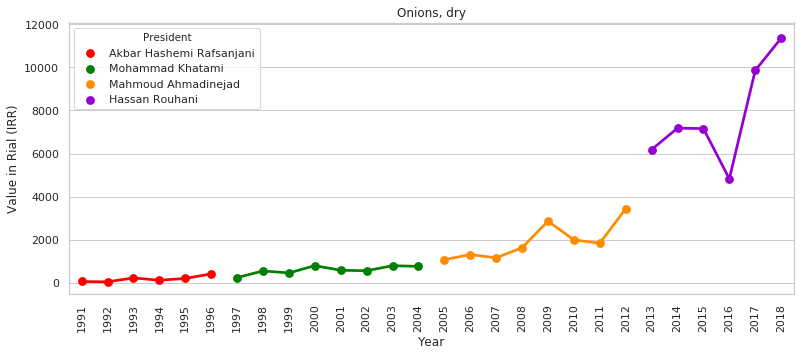

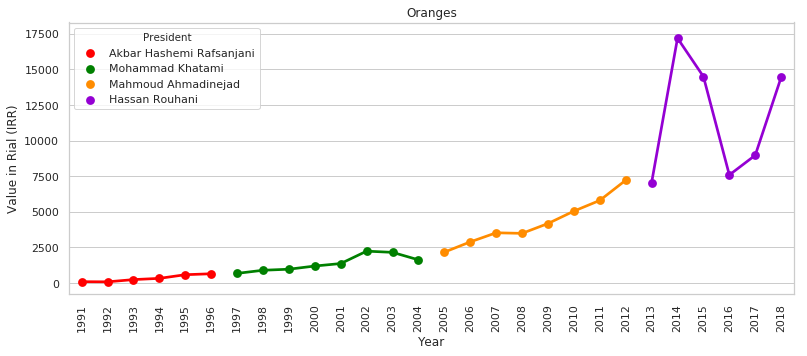

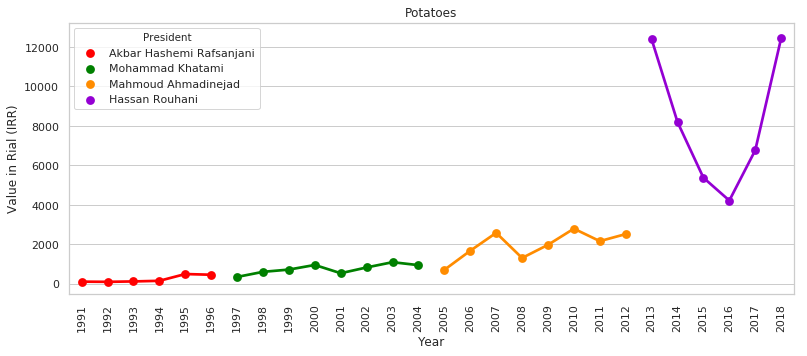

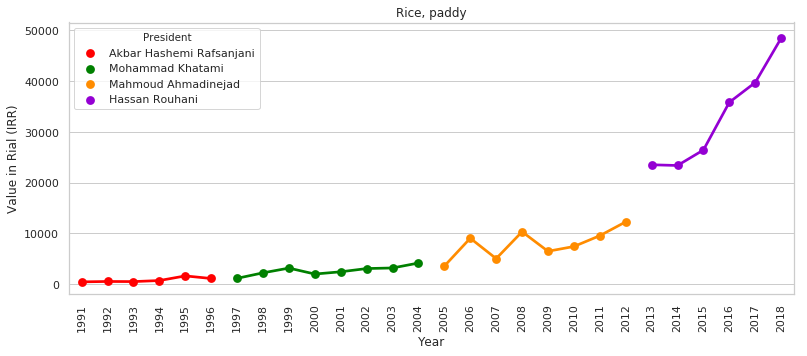

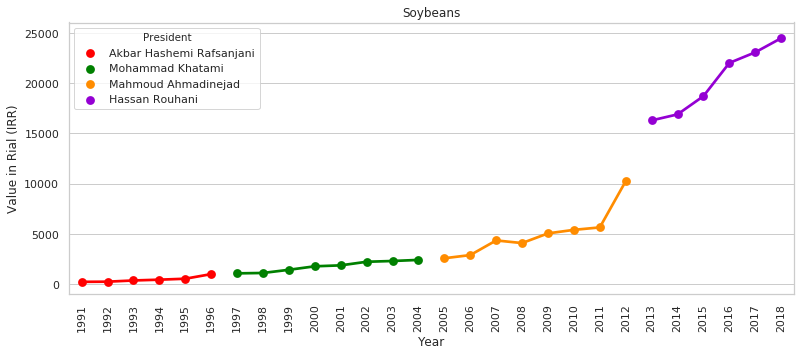

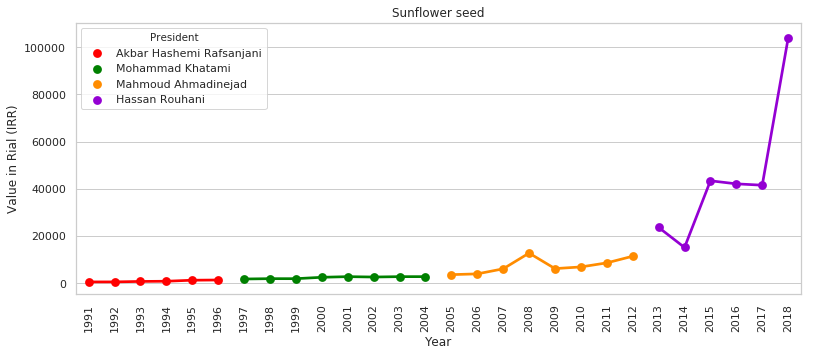

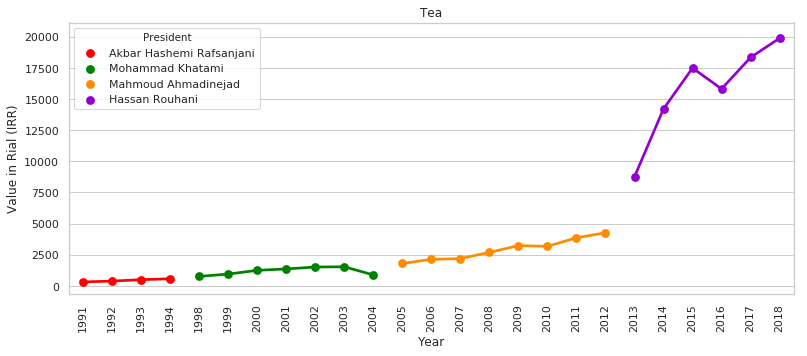

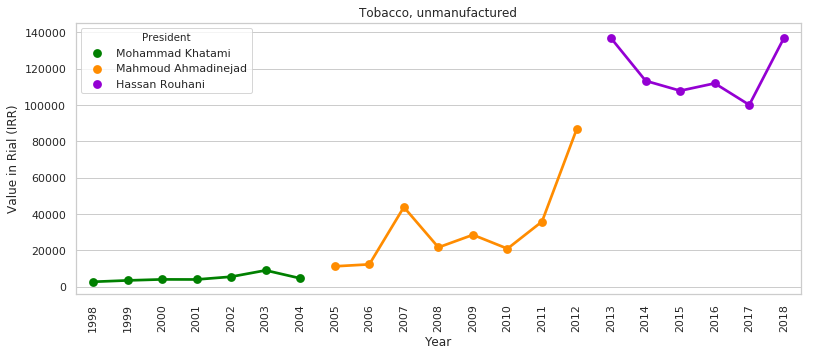

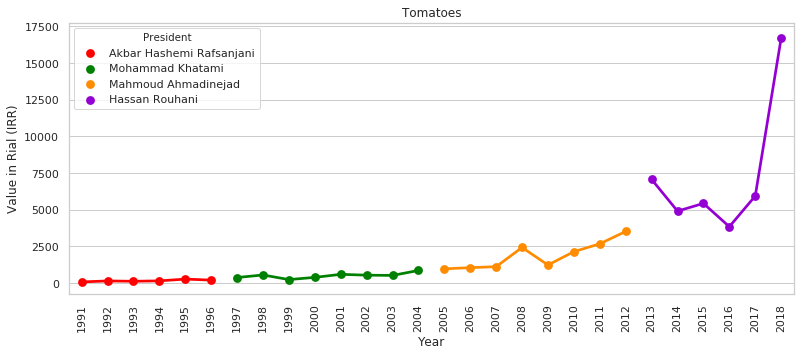

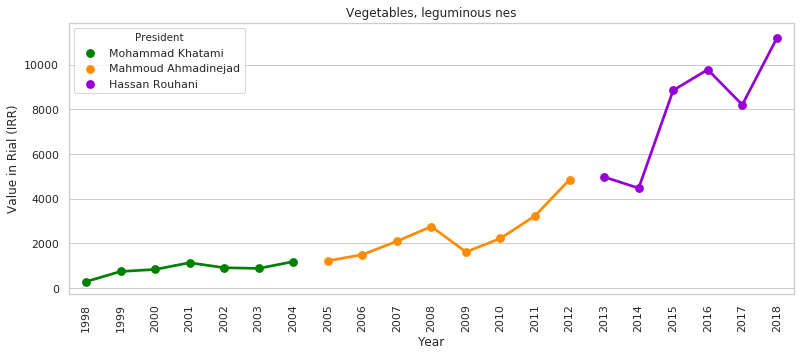

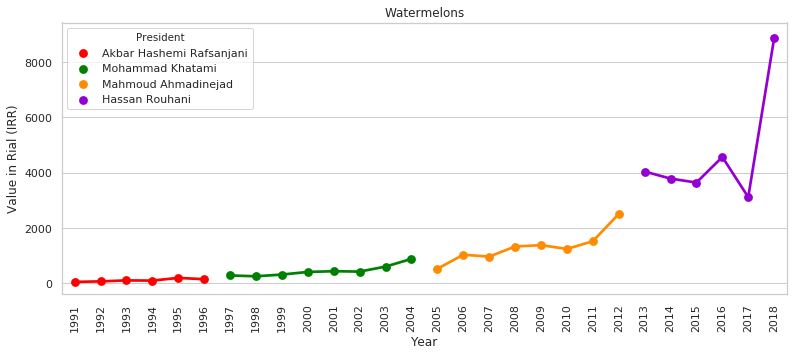

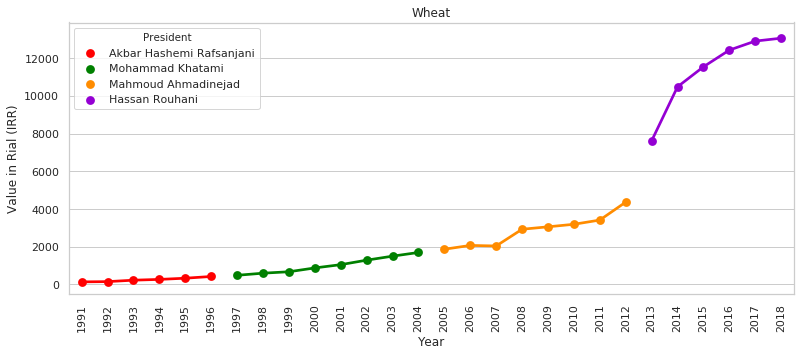

In [240]:
for item in list_of_items:
    df_temp = iran_price[iran_price['Item'] == item]
    sns.set(style="whitegrid")
    plt.figure(figsize=(13, 5))
    sns.pointplot(x = 'Year' , y = 'Price per Kg in Rial' , hue = 'President' , palette= color_dict , data = df_temp)
    plt.ylabel('Value in Rial (IRR)')
    plt.xlabel('Year')
    plt.xticks(rotation = 90)
    plt.title(item)
    plt.show()

In [241]:
iran_exchange = iran_exchange[iran_exchange['Year'] >= 1991]
iran_exchange.reset_index(inplace=True)
del iran_exchange['index']

In [242]:
iran_exchange['President'] = 0
for i in range(len(iran_exchange)):
    if iran_exchange['Year'].iloc[i] >= 1991 and iran_exchange['Year'].iloc[i] < 1997:
        iran_exchange['President'].iloc[i] = 'Akbar Hashemi Rafsanjani'
    elif iran_exchange['Year'].iloc[i] >= 1997 and iran_exchange['Year'].iloc[i] < 2005:
        iran_exchange['President'].iloc[i] = 'Mohammad Khatami'
    elif iran_exchange['Year'].iloc[i] >= 2005 and iran_exchange['Year'].iloc[i] < 2013:
        iran_exchange['President'].iloc[i] = 'Mahmoud Ahmadinejad'
    elif iran_exchange['Year'].iloc[i] >= 2013 and iran_exchange['Year'].iloc[i] <= 2020:
        iran_exchange['President'].iloc[i] = 'Hassan Rouhani'

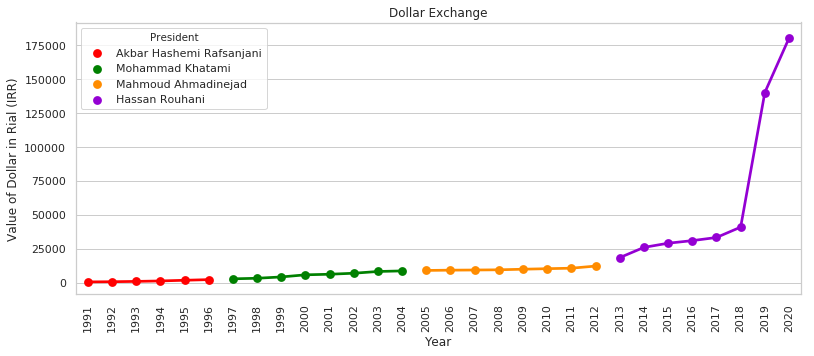

In [243]:
sns.set(style="whitegrid")
plt.figure(figsize=(13, 5))
sns.pointplot(x = 'Year' , y = 'Value' , hue = 'President' , palette= color_dict , data = iran_exchange)
plt.ylabel('Value of Dollar in Rial (IRR)')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.title('Dollar Exchange')
plt.show()

In [244]:
iran_population.rename(columns={'Value': 'Population'}, inplace=True)

In [245]:
iran_population['Population'] = iran_population['Population'] * 1000

In [246]:
new_pop = {'Year': [2019,2020] , 'Population': [83000000 , 85000000] }
new_pop = pd.DataFrame(new_pop)
iran_population = iran_population.append(new_pop)
iran_population.reset_index(inplace=True)
del iran_population['index']

In [247]:
iran_population['President'] = 0
for i in range(len(iran_population)):
    if iran_population['Year'].iloc[i] >= 1991 and iran_population['Year'].iloc[i] < 1997:
        iran_population['President'].iloc[i] = 'Akbar Hashemi Rafsanjani'
    elif iran_population['Year'].iloc[i] >= 1997 and iran_population['Year'].iloc[i] < 2005:
        iran_population['President'].iloc[i] = 'Mohammad Khatami'
    elif iran_population['Year'].iloc[i] >= 2005 and iran_population['Year'].iloc[i] < 2013:
        iran_population['President'].iloc[i] = 'Mahmoud Ahmadinejad'
    elif iran_population['Year'].iloc[i] >= 2013 and iran_population['Year'].iloc[i] <= 2020:
        iran_population['President'].iloc[i] = 'Hassan Rouhani'

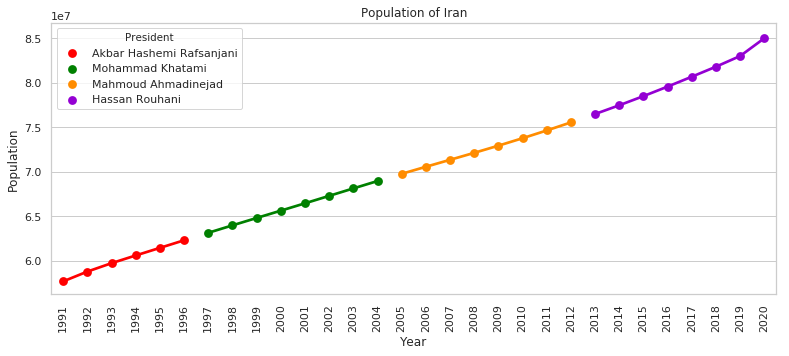

In [248]:
sns.set(style="whitegrid")
plt.figure(figsize=(13, 5))
sns.pointplot(x = 'Year' , y = 'Population' , hue = 'President' , palette= color_dict , data = iran_population)
plt.ylabel('Population')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.title('Population of Iran')
plt.show()

In [251]:
iran_price.to_csv('iran_home_basket_price_1991_to_2020.csv' , index = False)
iran_exchange.to_csv('iran_Exchange_1991_to_2020.csv' , index = False)
iran_population.to_csv('iran_populatopmn.csv' , index = False)

,Item,Year,Price per Kg in Rial,President,Population
0,Apples,1991,86.3590,Akbar Hashemi Rafsanjani,57679034.0
1,Apples,1992,120.0615,Akbar Hashemi Rafsanjani,58780370.0
2,Apples,1993,116.6790,Akbar Hashemi Rafsanjani,59723764.0
3,Apples,1994,250.7934,Akbar Hashemi Rafsanjani,60590614.0
4,Apples,1995,515.0850,Akbar Hashemi Rafsanjani,61442664.0
5,Apples,1996,481.1442,Akbar Hashemi Rafsanjani,62294920.0
6,Apples,1997,604.9883,Mohammad Khatami,63136312.0
7,Apples,1998,540.2110,Mohammad Khatami,63971836.0
8,Apples,1999,848.5848,Mohammad Khatami,64800880.0
9,Apples,2000,1133.0187,Mohammad Khatami,65623405.0
